# Feature selection - Correlation and P value

### Imports

In [28]:
import sys
import warnings
warnings.filterwarnings("ignore")

# Libraries for data processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

np.random.seed(123) # Important for reproducibility

%matplotlib inline

In [29]:
sys.path.append("")

### Loading the data

In [30]:
data = pd.read_csv('Breast_Cancer_Data.csv')

In [31]:
data.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,NaN
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,NaN
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,NaN
98,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,NaN


Removing the Id and the Unnamed columns

In [32]:
data = data.iloc[:,1:-1]

Encoding the Categorical Variable with "label_encoder" of sklearn

In [33]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

Exploring the variables in the dataset

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [35]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now the variable "diagnosis" is type float

<a id="3-2"></a>
## Selecting features using correlation
Generating the correlation matrix

In [36]:
corr = data.corr()
corr.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738


Generating the correlation heatmap

<Axes: >

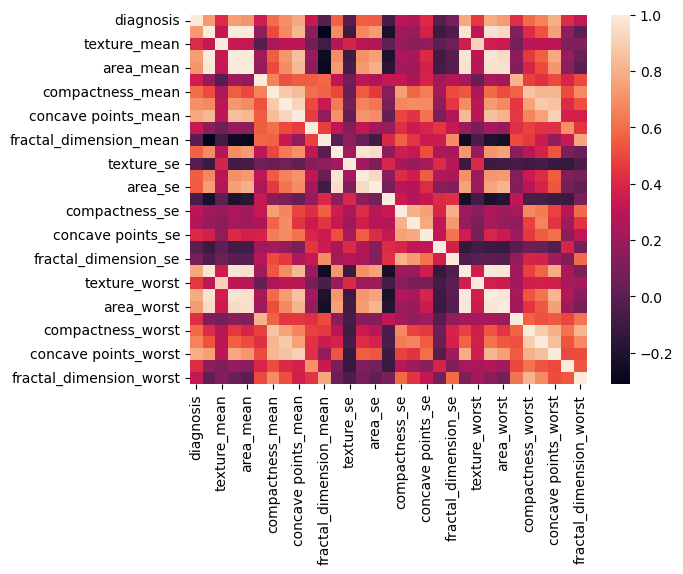

In [37]:
sns.heatmap(corr)

Compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [38]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            print("Correlation of ", data.columns[i], " and ", data.columns[j], "[", corr.iloc[i,j], "]")
            if columns[j]:
                print("Removing variable ", data.columns[j])
                columns[j] = False
### MODIFIED!!

Correlation of  radius_mean  and  perimeter_mean [ 0.9978552814938109 ]
Removing variable  perimeter_mean
Correlation of  radius_mean  and  area_mean [ 0.9873571700566127 ]
Removing variable  area_mean
Correlation of  radius_mean  and  radius_worst [ 0.9695389726112055 ]
Removing variable  radius_worst
Correlation of  radius_mean  and  perimeter_worst [ 0.9651365139559871 ]
Removing variable  perimeter_worst
Correlation of  radius_mean  and  area_worst [ 0.9410824595860461 ]
Removing variable  area_worst
Correlation of  texture_mean  and  texture_worst [ 0.912044588840421 ]
Removing variable  texture_worst
Correlation of  perimeter_mean  and  area_mean [ 0.9865068039913907 ]
Correlation of  perimeter_mean  and  radius_worst [ 0.9694763634663146 ]
Correlation of  perimeter_mean  and  perimeter_worst [ 0.9703868870426394 ]
Correlation of  perimeter_mean  and  area_worst [ 0.9415498080023068 ]
Correlation of  area_mean  and  radius_worst [ 0.9627460860470841 ]
Correlation of  area_mean  a

In [39]:
columns

array([ True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False,  True,  True])

In [40]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [41]:
selected_columns = data.columns[columns]

In [42]:
selected_columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

21 variables remain in the dataset

In [43]:
data = data[selected_columns]

The dataset has only those columns with correlation less than 0.9

<a id="3-3"></a>
## Selecting columns based on p-value

Select the columns based on how they affect the p-value

In [44]:
selected_columns = selected_columns[1:].values# Removing the dignosis column
# The column `diagnosis` (column 0) is removed because it is the column that should be predicted

In [45]:
import statsmodels.api as sm # MODIFIED!!!!
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [47]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [ ]:
selected_columns

Moving the result to a new dataframe

In [ ]:
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]

Creating a dataframe with the columns selected using the p-value and correlation

In [48]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [25]:
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,1.0,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,1.0,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,1.0,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,1.0,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


<a id="3-4"></a>
## Visualizing the selected features
Plotting the data to visualize their distribution

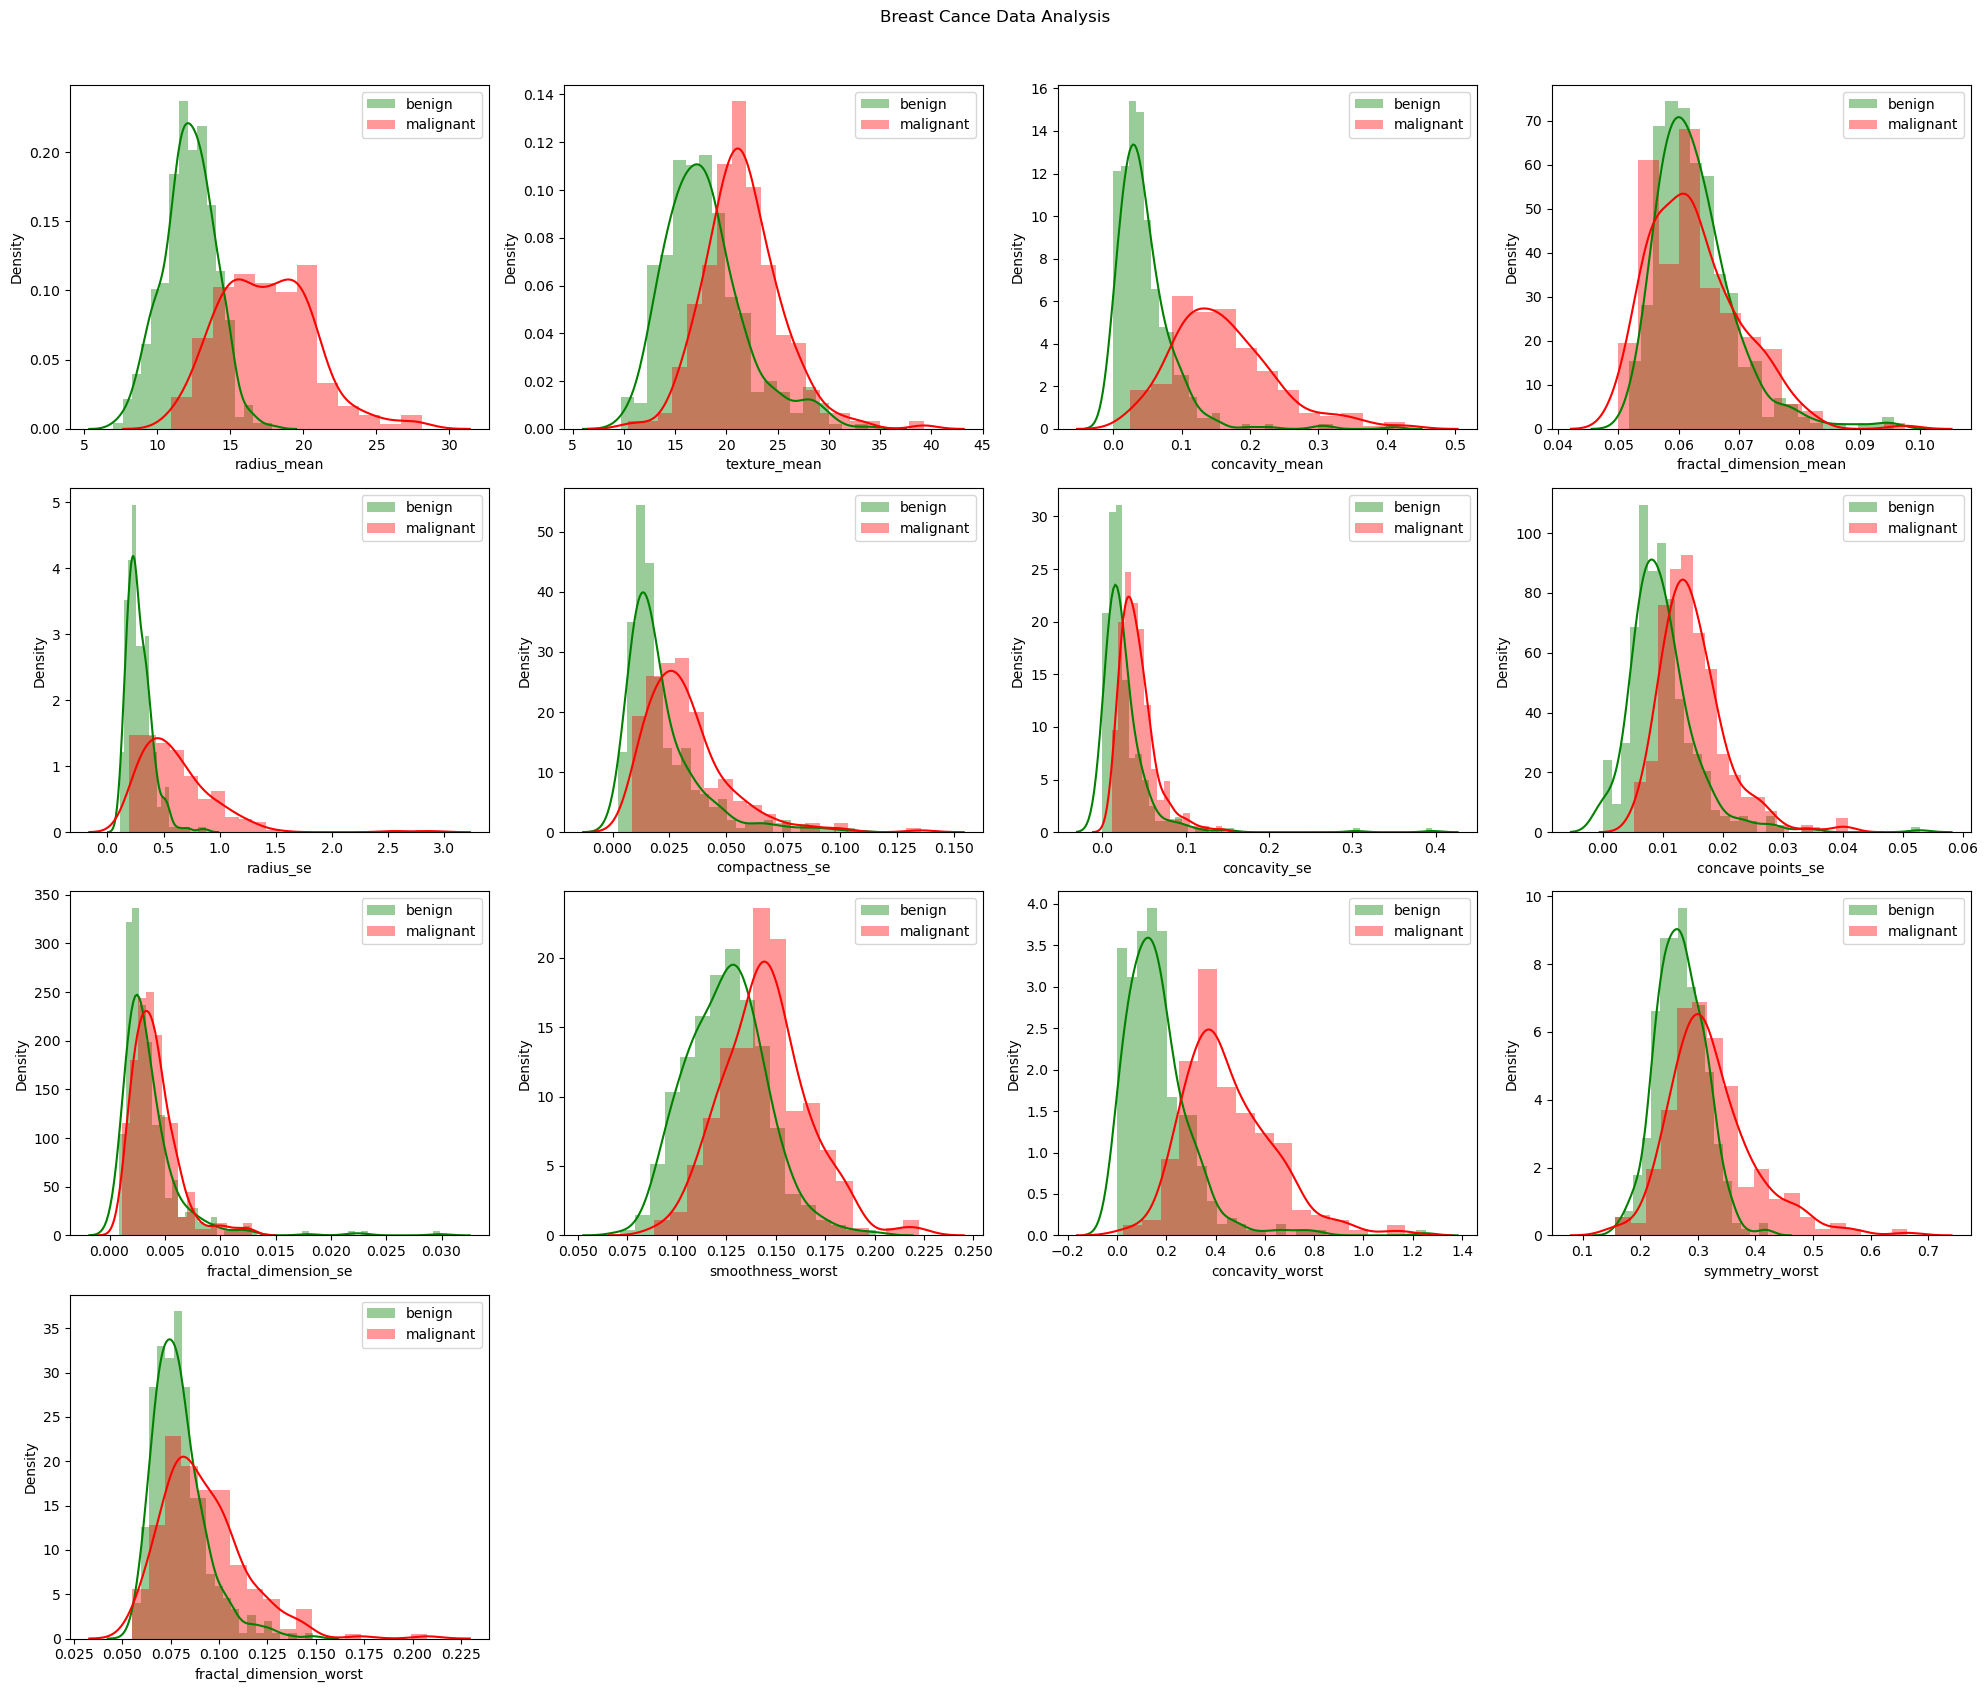

In [24]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Now we split the data to train and test set. 20% of the data is used to create the test data and 80% to create the train data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

In [26]:
len(y_test)

114

<a id="3-5"></a>
## Building a model with the selected features

Using a Support Vector Classifier (SVC) to make the predictions. 
The model is trained with the train data.
The test data is used to calculate the accuracy of the model.

In [ ]:
svc = SVC(random_state=0, gamma='auto')              # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

Making the predictions and calculating the accuracy

In [ ]:
prediction = svc.predict(x_test)

In [ ]:
y_test

The metrics are calculated with a confusion matrix

In [ ]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

The SVC model that has been trained with selected features (with p-value) has an accuracy of 0.9298

<a id="3-6"></a>
## Building a model without feature selection
All the above steps (except feature selection) are repeated:
* Loading the data
* Removing the unwanted columns
* Encoding the categorical variable
* Splitting the data into train and test set
* Fitting the data to the model
* Making the predictions and calculating the accuracy

In [ ]:
data = pd.read_csv('Breast_Cancer_Data.csv')          
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,1]
data = data.iloc[:,2:-1]                         
label_encoder = LabelEncoder()              
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.4)      
svc = SVC(random_state=0, gamma='auto')
svc.fit(x_train, y_train)                        
prediction = svc.predict(x_test)                 
cm = confusion_matrix(y_test, prediction)        
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)

The SVC model that has been trained with all the features has an accuracy of 0.649

### Working with bad quality data

Repeating all the previous steps and adding noise to original data

In [ ]:
data = pd.read_csv('Breast_Cancer_Data.csv')          
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,1]
data = data.iloc[:,2:-1]                         
label_encoder = LabelEncoder()              
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
## Adding random variables and noise to the data frame 
noise = np.random.randint(1, 6, [data.shape[0],data.shape[1]])
data = data + noise
# Model training
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.4)      
svc = SVC(random_state=0, gamma='auto')
svc.fit(x_train, y_train)                        
prediction = svc.predict(x_test)                 
cm = confusion_matrix(y_test, prediction)        
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)

The new accuracy of the model is 0.6052 --> Very important to have data of good quality and clear data

### Other example of use of p-value

In [ ]:
import statsmodels.api as sm
import numpy as np
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
Y = duncan_prestige.data['income']
X = duncan_prestige.data['education']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

In [ ]:
duncan_prestige.data.head()

In [ ]:
results.tvalues

In [ ]:
print(results.t_test([1, 0]))

In [ ]:
print(results.f_test(np.identity(2)))